## Example of how to fit a plane to a 2D dataset

In [1]:
%matplotlib inline

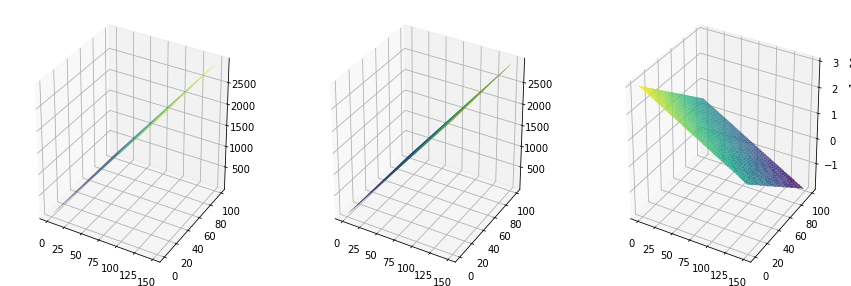

Original parameters: [10, 20, 0]
Fit parameters: ['10.0', '20.0', '0.0']


In [19]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

nx = 100 # size of x
ny = 150 # size of y 
a0 = 10 # mean
a1 = 20 # slope in x
a2 = 0  # slope in y

xx, yy = np.mgrid[:ny, :nx] # meshgrid in x and y

data = a0 + a1*xx + a2*yy # create a fake plane to test the fit

X = np.hstack(( np.reshape(xx, (ny*nx, 1)) , np.reshape(yy, (nx*ny, 1)) ) )
X = np.hstack(( np.ones((nx*ny, 1)) , X ))
F = np.reshape(data, (nx*ny, 1))

params = np.dot(np.dot( np.linalg.pinv(np.dot(X.transpose(), X)), X.transpose()), F)
fit = np.reshape(np.dot(X, params), (ny, nx));

fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(131, projection='3d')
ax1.plot_surface(xx, yy, data, cmap='viridis')

ax2 = fig.add_subplot(132, projection='3d')
ax2.plot_surface(xx, yy, fit)
ax2.plot_surface(xx, yy, data, cmap='viridis')

res = data - fit
ax3 = fig.add_subplot(133, projection='3d')
ax3.plot_surface(xx, yy, res, cmap='viridis')
plt.show()

print("Original parameters:", [a0,a1,a2])
print("Fit parameters:", ['%.1f' %a[0] for a in params])